### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [243]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [244]:
data = pd.read_csv('data/coupons.csv')

In [245]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [246]:

data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [247]:
# Describe data
data.describe()


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [248]:
# Lets find the value counts for each column
for col in data.columns:
  print(col)
  print(data[col].value_counts())
  

destination
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
passanger
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
weather
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
temperature
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
time
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
coupon
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
expiration
expiration
1d    7091
2h    5593
Name: count, dtype: int64
gender
gender
Female    6511
Male      6173
Name: count, dtype: int64
age
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int

3. Decide what to do about your missing data -- drop, replace, other...

In [249]:
#drop car column as it monstly empty

data = data.drop(columns=['car'])
# drop rows with NaN values that way we can focus on the complete cases
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [250]:
# proportion of coupons redeemed
Coupons_redeemed_proportion = data['Y'].sum() / data.shape[0]
print(f"Proportion of coupons redeemed: {Coupons_redeemed_proportion:.2f}")

Proportion of coupons redeemed: 0.57


5. Use a bar plot to visualize the `coupon` column.

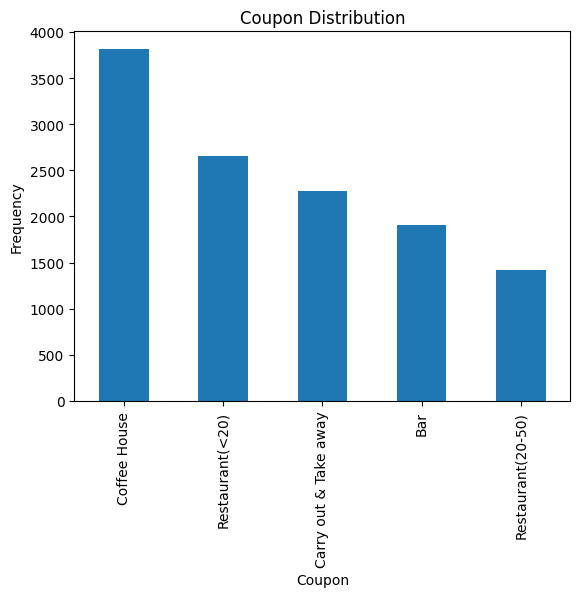

<Figure size 640x480 with 0 Axes>

In [251]:
data['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Distribution')
plt.xlabel('Coupon')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/coupon_distribution.png')

6. Use a histogram to visualize the temperature column.

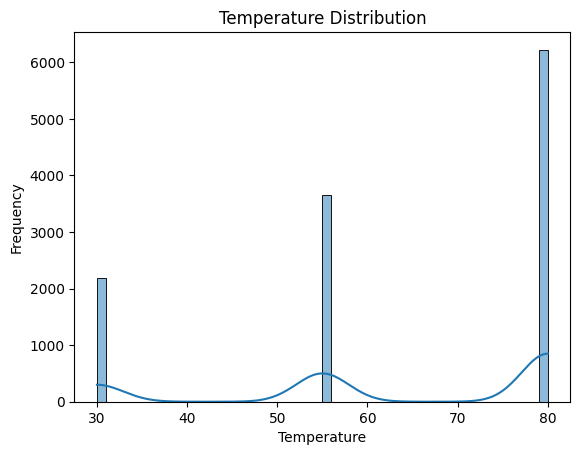

<Figure size 640x480 with 0 Axes>

In [252]:
sns.histplot(data['temperature'], bins=50, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/temperature_distribution.png')  

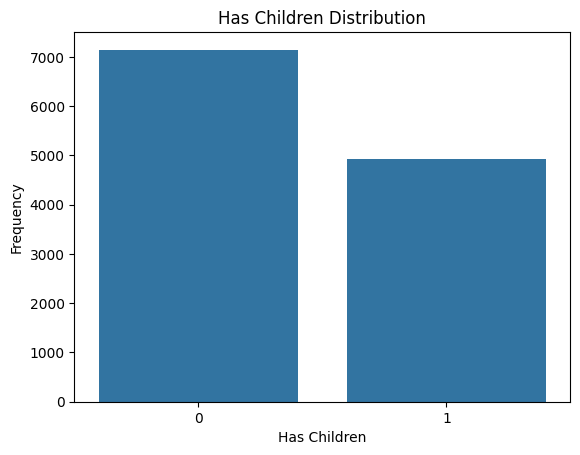

<Figure size 640x480 with 0 Axes>

In [253]:
# Plotting the has_children with countplot as there are only two values
sns.countplot(x='has_children', data=data)            
plt.title('Has Children Distribution')
plt.xlabel('Has Children')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/has_children_distribution.png')

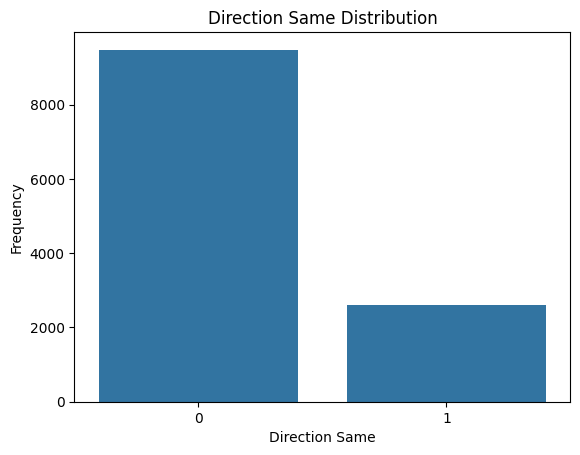

<Figure size 640x480 with 0 Axes>

In [254]:
# Plotting the Direction Same with countplot as there are only two values
sns.countplot(x='direction_same', data=data)            
plt.title('Direction Same Distribution')
plt.xlabel('Direction Same')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/direction_same_distribution.png')   

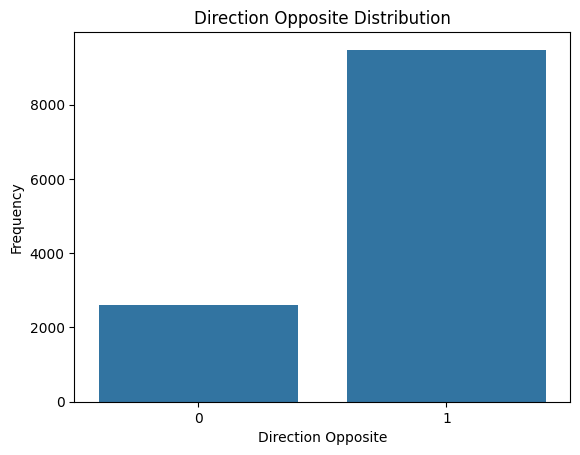

<Figure size 640x480 with 0 Axes>

In [255]:
# Plotting the Direction opposite with countplot as there are only two values
sns.countplot(x='direction_opp', data=data)            
plt.title('Direction Opposite Distribution')
plt.xlabel('Direction Opposite')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/direction_distribution.png')

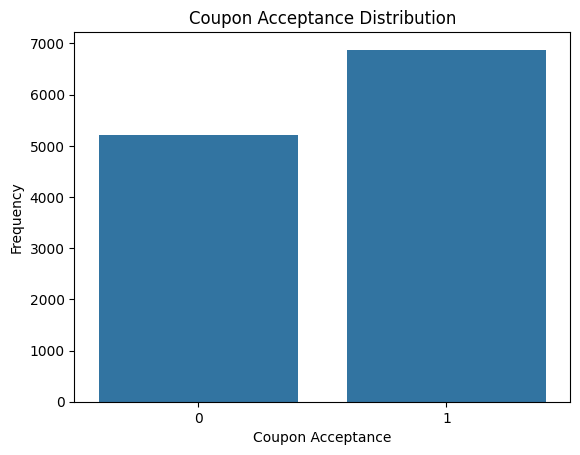

<Figure size 640x480 with 0 Axes>

In [256]:
# Plotting the coupon acceptance with countplot as there are only two values
sns.countplot(x='Y', data=data)            
plt.title('Coupon Acceptance Distribution')
plt.xlabel('Coupon Acceptance')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/coupon_acceptance_distribution.png')

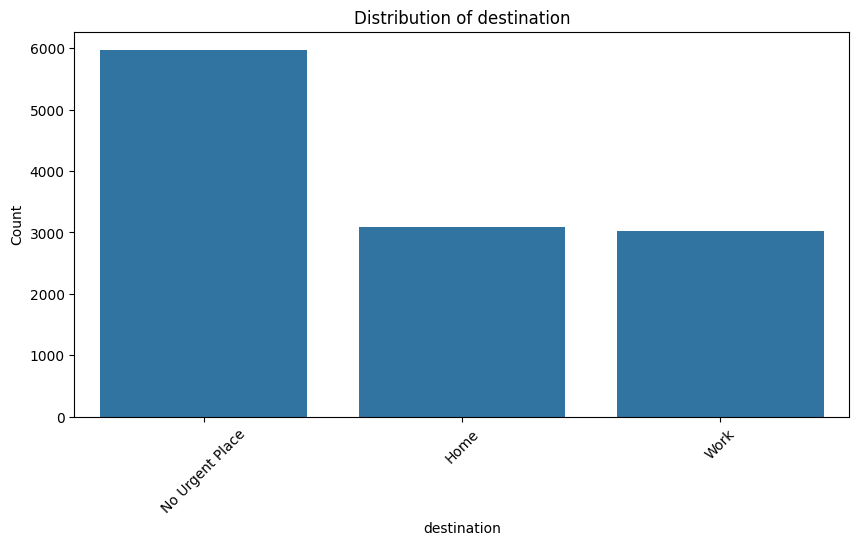

<Figure size 640x480 with 0 Axes>

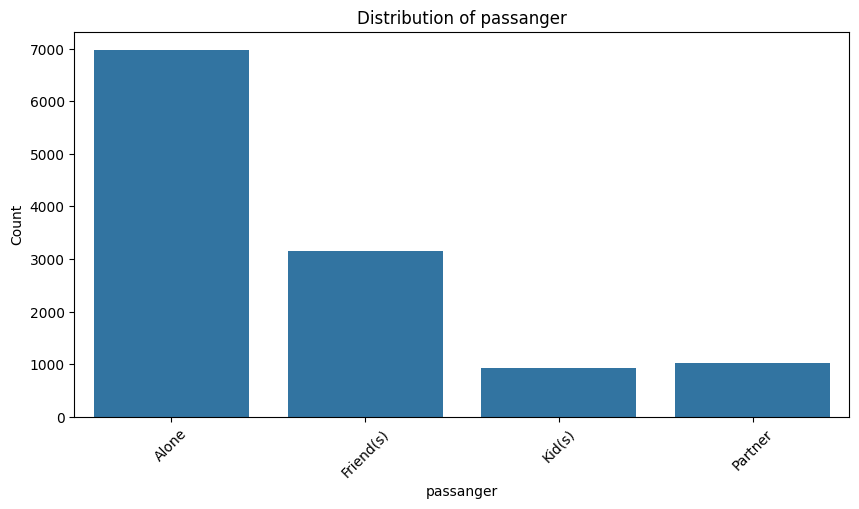

<Figure size 640x480 with 0 Axes>

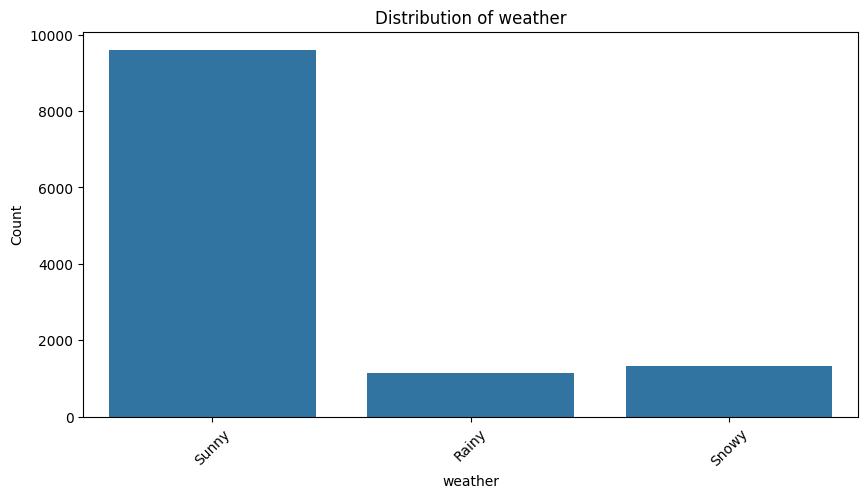

<Figure size 640x480 with 0 Axes>

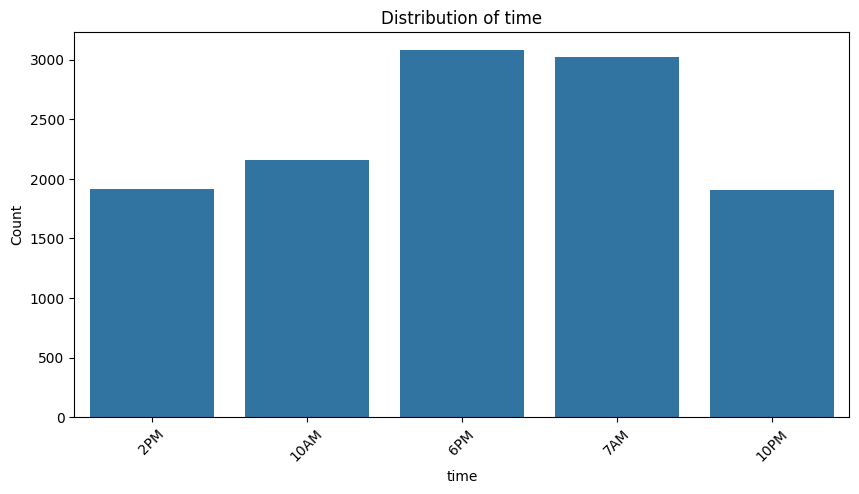

<Figure size 640x480 with 0 Axes>

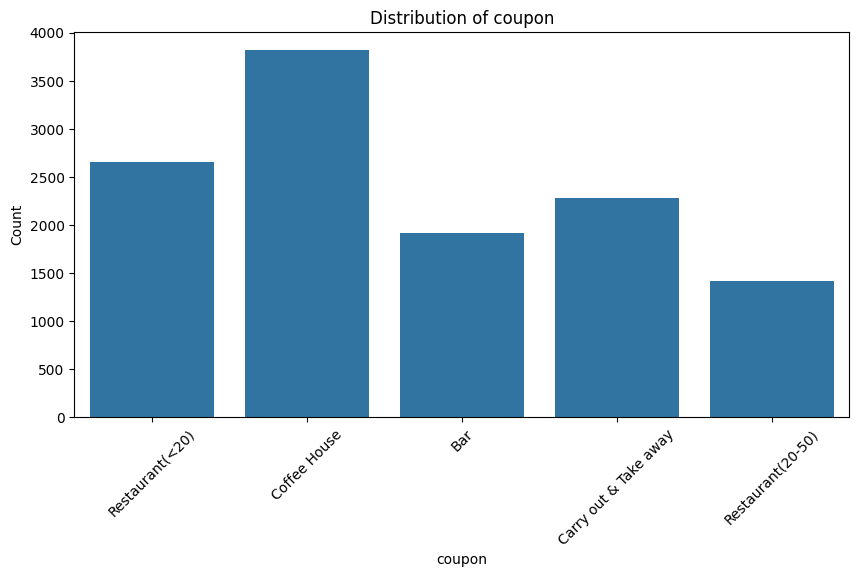

<Figure size 640x480 with 0 Axes>

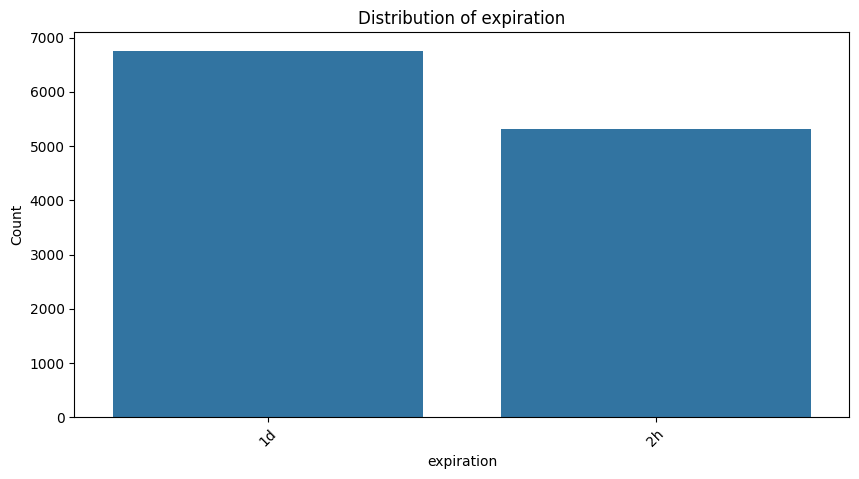

<Figure size 640x480 with 0 Axes>

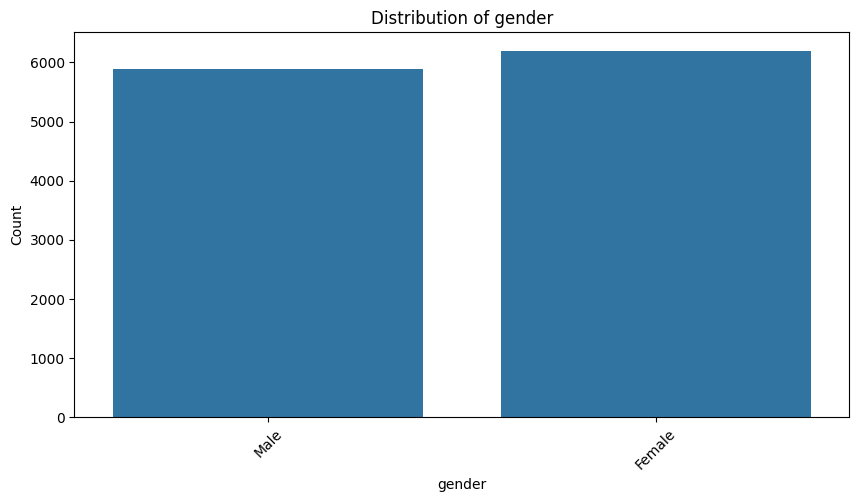

<Figure size 640x480 with 0 Axes>

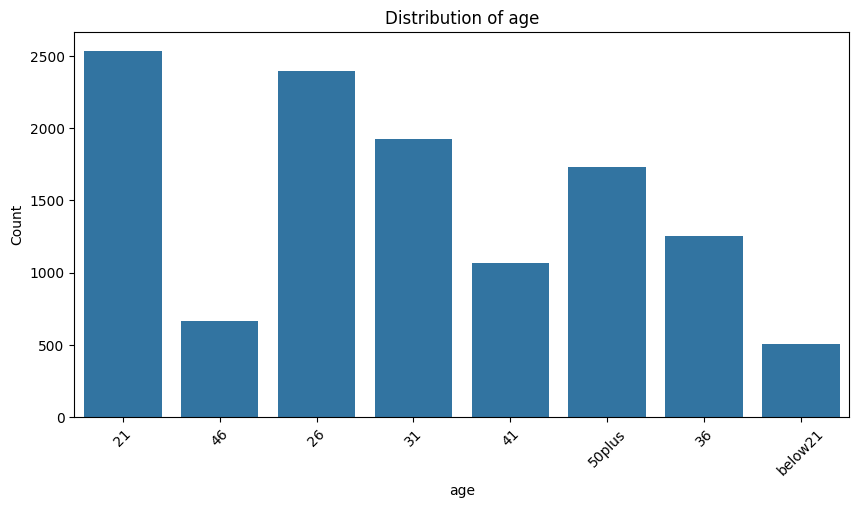

<Figure size 640x480 with 0 Axes>

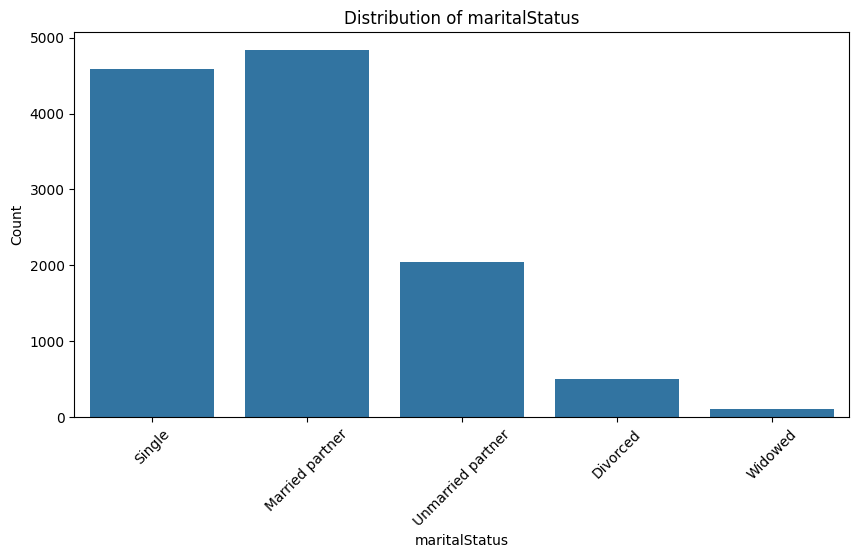

<Figure size 640x480 with 0 Axes>

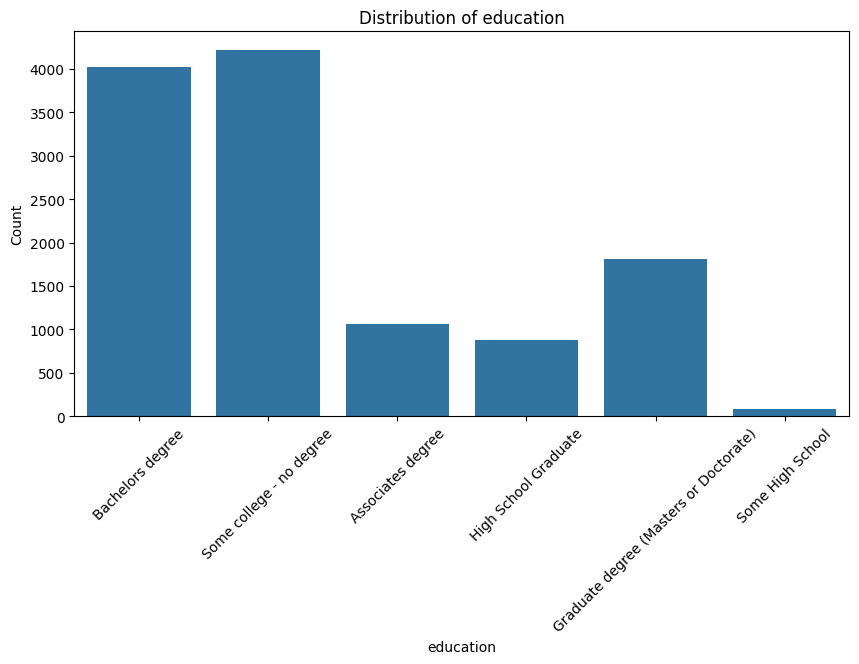

<Figure size 640x480 with 0 Axes>

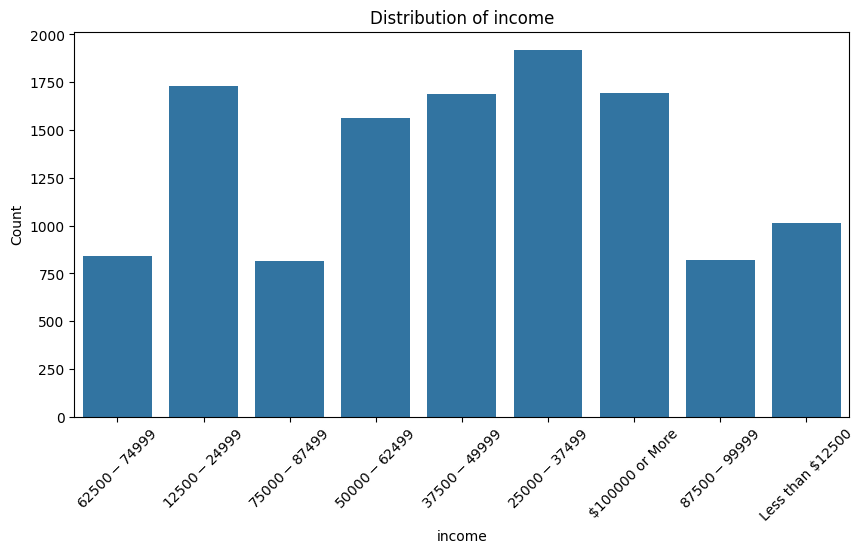

<Figure size 640x480 with 0 Axes>

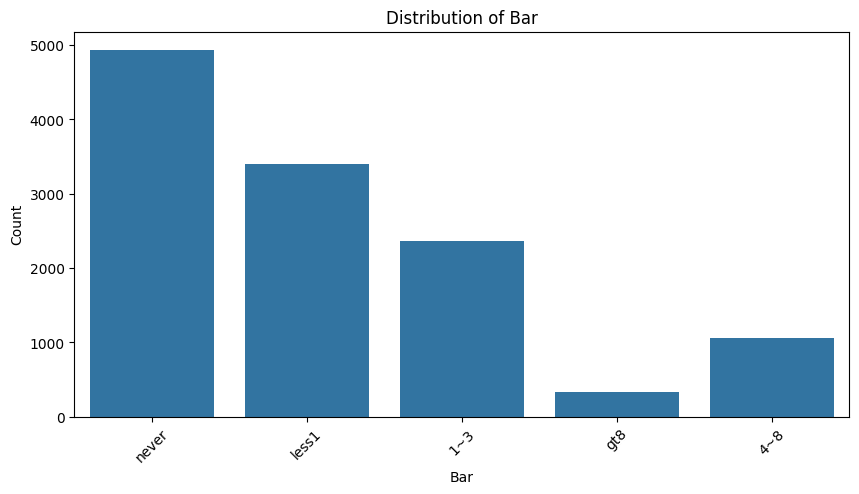

<Figure size 640x480 with 0 Axes>

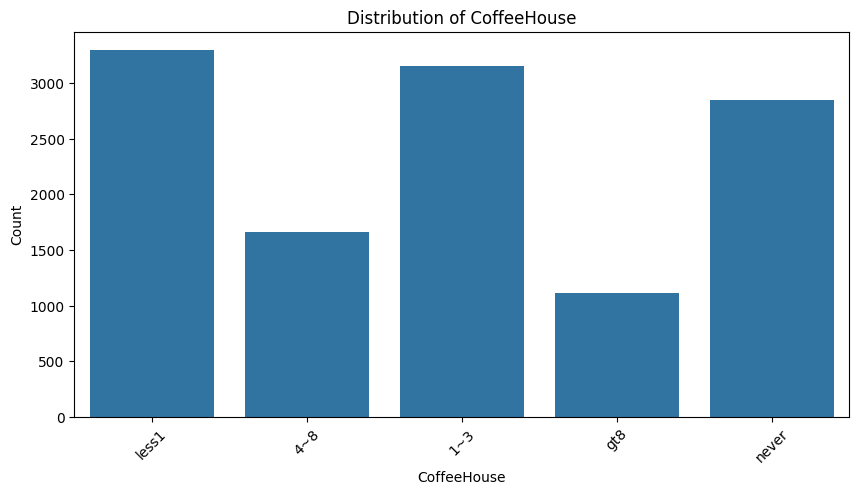

<Figure size 640x480 with 0 Axes>

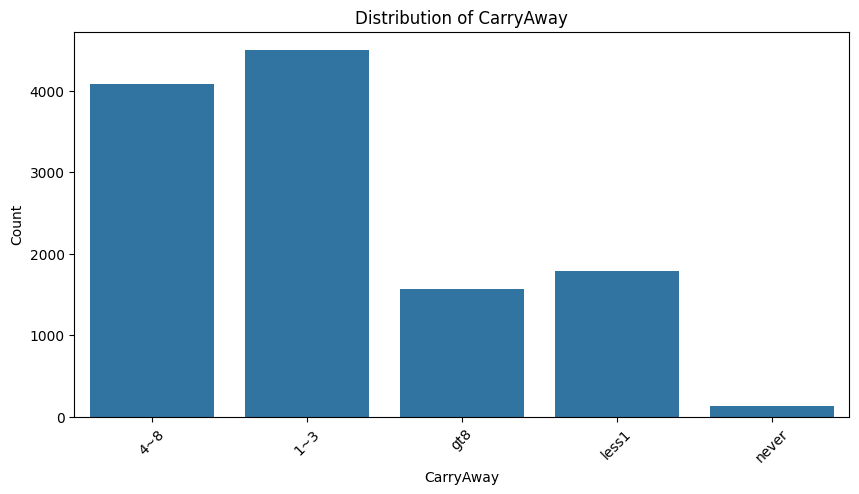

<Figure size 640x480 with 0 Axes>

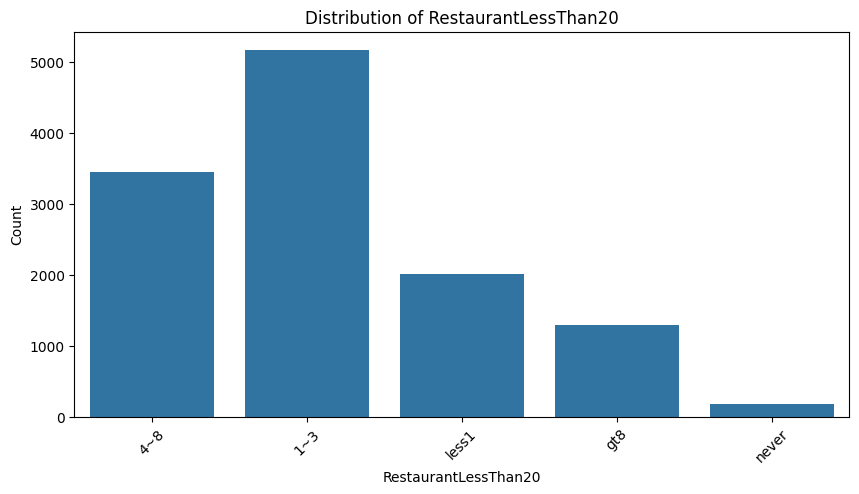

<Figure size 640x480 with 0 Axes>

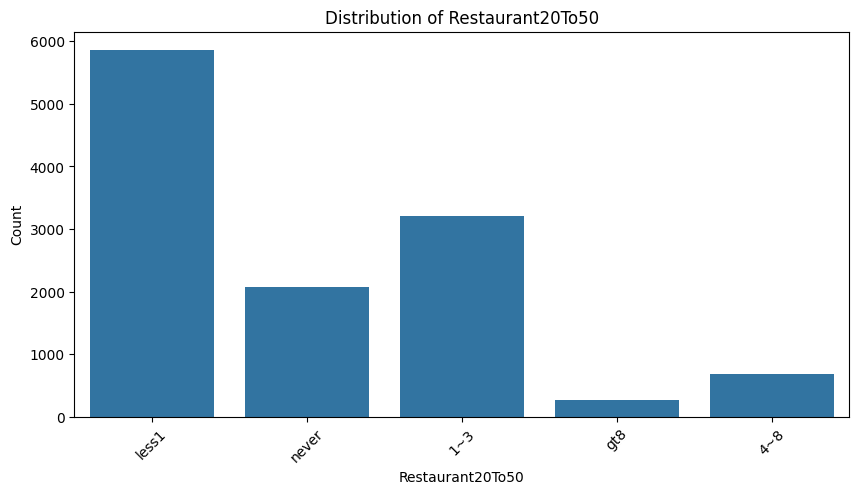

<Figure size 640x480 with 0 Axes>

In [257]:
# Lets also plot distribution of non-numerical columns
non_numerical_columns = data.select_dtypes(include=['object']).columns
for col in non_numerical_columns:
    if col == 'occupation':
        continue
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=data)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()
    plt.savefig(f'images/distribution_{col}.png')

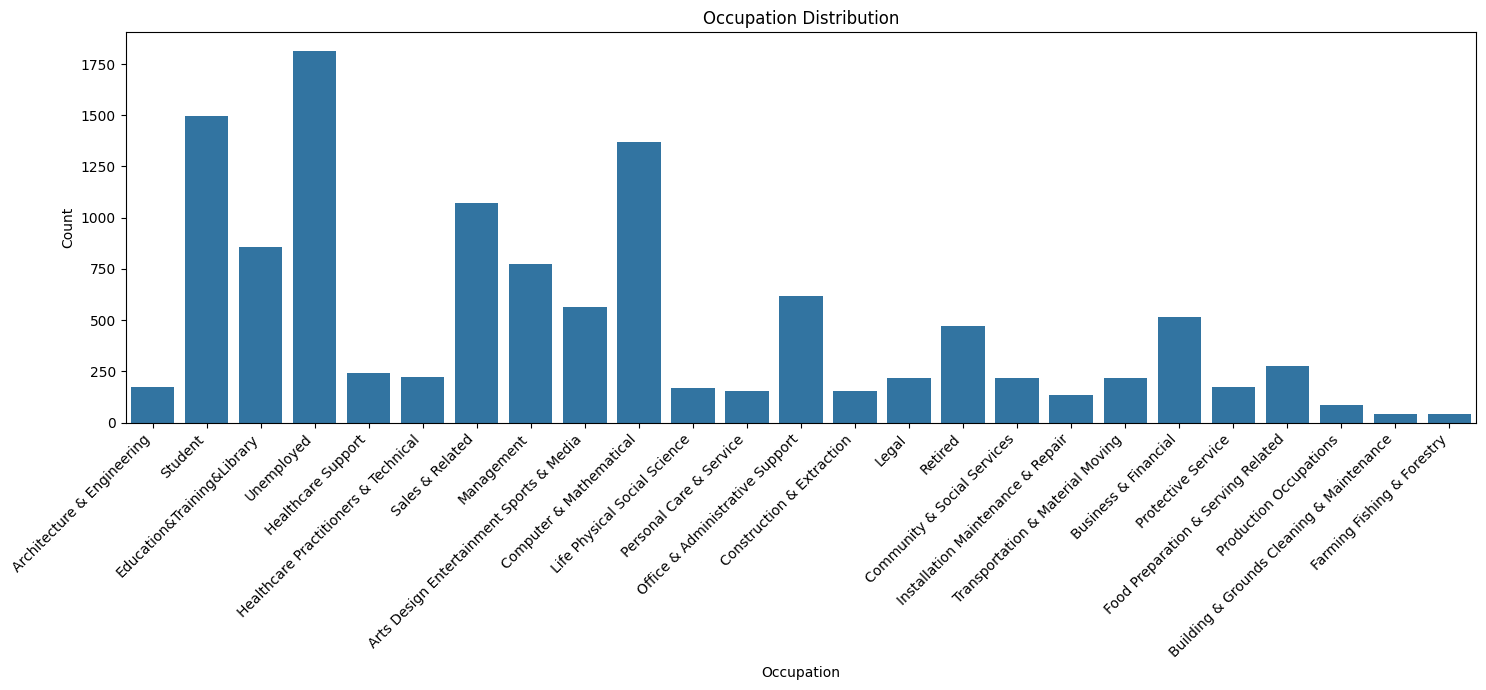

<Figure size 640x480 with 0 Axes>

In [258]:
# Occupation is a categorical variable with many unique values, 
#plot the x labels correctly as they are too many and overlap
plt.figure(figsize=(15, 7))
sns.countplot(x='occupation', data=data)
plt.title('Occupation Distribution')
#truncate x labels to avoid overlap
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Count') 
plt.xlabel('Occupation')
plt.show() 
plt.savefig('images/occupation_distribution.png', bbox_inches='tight') 


Some findings from the plotting of different numerical an non-numerical colums
1. Occumpation labels were coming overlapping so has to create it separately to that it can be cleanly depicted.
2.Most visits to restaurant is with less than once a month
3. Weather is mostly sunny and hence skewed towards sunny
4. Widowed are very less part of the population - So seems like widowed don't travel much.
5. Coupons are more skewed towards coffee house
6. From degree perspective more Bachelors and some college are high part of popolation

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [259]:
# Create a new DataFrame for bar coupons based on the 'coupon' column by filtering the original DataFrame
data1_bar_coupons_only = data[data['coupon'] == 'Bar'].copy()
data1_bar_coupons_only.shape

(1913, 25)

2. What proportion of bar coupons were accepted?


In [260]:
# Calculate the proportion of bar coupons accepted, Summing gets the numer of Y =1 and then dividing by the total number of bar coupons
bar_coupons_accepted = data1_bar_coupons_only['Y'].sum() / len(data1_bar_coupons_only)
print(f"Proportion of Bar coupons accepted: {bar_coupons_accepted:.2f}")    

Proportion of Bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [261]:
# Create new columns to categorize the 'Bar' column into two groups: less than or equal to 3 visits and greater than 3 visits
# This will help in analyzing the acceptance rates based on the frequency of visits to the bar
data1_bar_coupons_only['Bar_lesseq_3'] = data1_bar_coupons_only['Bar'].apply(lambda x: x in ['never', 'less1', '1~3'])
data1_bar_coupons_only['Bar_greater_3'] = data1_bar_coupons_only['Bar'].apply(lambda x: x in ['4~6', 'gt8'])   
acceptance_rate_lesseq3 = data1_bar_coupons_only.groupby('Bar_lesseq_3')['Y'].mean()   
acceptance_rate_greater3 = data1_bar_coupons_only.groupby('Bar_greater_3')['Y'].mean()
print(f"Acceptance rate for Bar coupons (1-3 times): {acceptance_rate_lesseq3[True]:.2f}")
print(f"Acceptance rate for Bar coupons (more than 3 times): {acceptance_rate_greater3[True]:.2f}")

Acceptance rate for Bar coupons (1-3 times): 0.37
Acceptance rate for Bar coupons (more than 3 times): 0.72


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [262]:
# Create a new column to categorize the 'Bar' column into two groups: over 25 years old and others
# This will help in analyzing the acceptance rates based on age and frequency of visits to the bar
# The condition checks if the age is not '21' or 'below21' and if the 'Bar' visits are not 'never' or 'less1'   

data1_bar_coupons_only['Baragegt25andmore1'] = data1_bar_coupons_only.eval('(age != "21") & (age != "below21") & (Bar != "never") & (Bar != "less1")')
acceptance_rate_Baragegt25andmore1 = data1_bar_coupons_only.groupby('Baragegt25andmore1')['Y'].mean()
print(f"Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 : {acceptance_rate_Baragegt25andmore1[True]:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_Baragegt25andmore1[False]:.2f}")



Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 : 0.69
Acceptance rate for all others: 0.34


Yes, there is a difference between the two groups.
For drivers who go to a bar more than once a month and are over the age of 25 acceptance rate: 0.69 
For drivers who do not match the above criteria acceptance rate: 0.34

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [263]:
# The main issue is to come up with the proper evaluation condition
# This condition checks if the 'Bar' visits are not 'never' or 'less1', 
# if the 'passanger' is not 'Kid(s)', and if the 'occupation' is not 'Farming Fishing & Forestry'
# This will help in analyzing the acceptance rates based on the frequency of visits to the bar, passenger type, and occupation

eval_condition = '(Bar != "never") & (Bar != "less1") & (passanger != "Kid(s)") & (occupation != "Farming Fishing & Forestry")'
data1_bar_coupons_only['eval_condition'] = data1_bar_coupons_only.eval(eval_condition)
acceptance_rate_eval_condition = data1_bar_coupons_only.groupby('eval_condition')['Y'].mean()
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_eval_condition[True]:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_eval_condition[False]:.2f}")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.71
Acceptance rate for all others: 0.30


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [264]:
eval_condition1 = '(Bar != "never") & (Bar != "less1") & (passanger != "Kid(s)") & (maritalStatus != "Widowed")'
eval_condition2 = '(Bar != "never") & (Bar != "less1") & (age in ["below21", "21", "26"])'
eval_condition3 = '(RestaurantLessThan20 in ["4~8", "gt8"]) & (income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])'
data1_bar_coupons_only['compeval_condition'] = data1_bar_coupons_only.eval(f'({eval_condition1}) or ({eval_condition2}) or ({eval_condition3})')
acceptance_rate_compeval_condition = data1_bar_coupons_only.groupby('compeval_condition')['Y'].mean()
print(f"Acceptance rate for drivers who \
      \n go to bars more than once a month, had passengers that were not a kid, and were not widowed OR \
      \n go to bars more than once a month and are under the age of 30 OR \
      \n go to cheap restaurants more than 4 times a month and income is less than 50K : {acceptance_rate_compeval_condition[True]:.4f}")
print(f"Acceptance rate for all others: {acceptance_rate_compeval_condition[False]:.4f}")

Acceptance rate for drivers who       
 go to bars more than once a month, had passengers that were not a kid, and were not widowed OR       
 go to bars more than once a month and are under the age of 30 OR       
 go to cheap restaurants more than 4 times a month and income is less than 50K : 0.5871
Acceptance rate for all others: 0.2999


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [265]:
#Based on the above analysis, we can conclude that:
#1. Total bar coupon acceptance rate is 0.41
#2. The acceptance rate for bar coupons is higher for  individuals above 25 and who visit bars more than once a month.
#3. The acceptance rate is also higher for individuals with no Kids, are not widowed, and do not work in farming, fishing, or forestry.
#4. The acceptance rate is lower for individuals who visit bars less than once a month or have Kids.
#5. The acceptance rate is  lower for widowed or work in farming, fishing, or forestry.
#5. The acceptance rate is significantly lower for folks who visit bars less than once a month and have kids.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [266]:
# Lets explore the coffee house coupons
# Create a new DataFrame for coffee coupons based on the 'coupon' column by filtering the original DataFrame
data1_coffee_house_coupons_only = data[data['coupon'] == 'Coffee House'].copy()
data1_coffee_house_coupons_only.shape


(3816, 25)

In [267]:
# Calculate the proportion of coffeehouse coupons accepted, Summing gets the numer of Y =1 and then dividing by the total number of coffeehouse coupons
coffee_house_coupons_accepted = data1_coffee_house_coupons_only['Y'].sum() / len(data1_coffee_house_coupons_only)
print(f"Proportion of Coffee House coupons accepted: {coffee_house_coupons_accepted:.2f}")    
 

Proportion of Coffee House coupons accepted: 0.50


In [268]:

#Compare the acceptance rate between those who went to a Coffee 3 or fewer times a month to those who went more.
coffee_eval_condition = '(CoffeeHouse in ["never", "less1", "1~3"])'
data1_coffee_house_coupons_only['CoffeeHouse_lesseq_3'] = data1_coffee_house_coupons_only.eval(coffee_eval_condition)
coffee_house_lesseq_3 = data1_coffee_house_coupons_only.groupby('CoffeeHouse_lesseq_3')['Y'].mean()
print(f"Acceptance rate for Coffee House coupons (1-3 times): {coffee_house_lesseq_3[True]:.2f}")
print(f"Acceptance rate for Coffee House coupons (more than 3 times): {coffee_house_lesseq_3[False]:.2f}")


Acceptance rate for Coffee House coupons (1-3 times): 0.45
Acceptance rate for Coffee House coupons (more than 3 times): 0.67


In [269]:
#Compare the acceptance rate between drivers who go to a Coffee House more than once a month and are over the age of 25 to the all others.  Is there a difference?
eval_condition_less1_age25 = '(CoffeeHouse in ["4~6", "gt8"]) & (age != "21") & (age != "below21")'
data1_coffee_house_coupons_only['CoffeeHouse_less1_age_over25'] = data1_coffee_house_coupons_only.eval(eval_condition_less1_age25)
coffee_house_less1_age_over25 = data1_coffee_house_coupons_only.groupby('CoffeeHouse_less1_age_over25')['Y'].mean()
print(f"Acceptance rate for Coffee House coupons (1-3 times): {coffee_house_less1_age_over25[True]:.2f}")
print(f"Acceptance rate for Coffee House coupons (more than 3 times): {coffee_house_less1_age_over25[False]:.2f}")
data1_coffee_house_coupons_only['CoffeeHouse'].value_counts()

Acceptance rate for Coffee House coupons (1-3 times): 0.62
Acceptance rate for Coffee House coupons (more than 3 times): 0.49


CoffeeHouse
less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: count, dtype: int64

In [270]:
#Use the same process to compare the acceptance rate between drivers who go to Coffee House eq or more than once a month and age above 25 and 
# had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
eval_condition_passenger_occupation = '(CoffeeHouse in ["1~3","4~6", "gt8"]) & (age != "21") & (age != "below21") & (passanger != "Kid(s)") & (occupation != "Farming Fishing & Forestry")'
data1_coffee_house_coupons_only['CoffeeHouse_passenger_occupation'] = data1_coffee_house_coupons_only.eval(eval_condition_passenger_occupation)
coffee_house_passenger_occupation = data1_coffee_house_coupons_only.groupby('CoffeeHouse_passenger_occupation')['Y'].mean()
print(f"Acceptance rate for Coffee House coupons (1-3 times): {coffee_house_passenger_occupation[True]:.2f}")
print(f"Acceptance rate for Coffee House coupons (more than 3 times): {coffee_house_passenger_occupation[False]:.2f}")


Acceptance rate for Coffee House coupons (1-3 times): 0.64
Acceptance rate for Coffee House coupons (more than 3 times): 0.45
